<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Отлично, Антон! Ты здорово поработал над комментариями и теперь твой проект принят.
    
Спасибо за работу и успехов в следующих проектах!)

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Антон, ты хорошо поработал над комментариями, но все же у меня еще остались замечания, они отмечены v 2.0 и красным цветом. Пожалуйста, исправь их и я буду рад принять твой проект)

<div style="border:solid green 2px; padding: 20px">
<b>Привет!</b>

Меня зовут Михаленко Дмитрий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Объёмная и творческая аналитическая задача, тем интереснее будет с ней справиться! </div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Описание данных:
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — общая площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

In [2]:
data.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:

data.duplicated().sum()

0

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

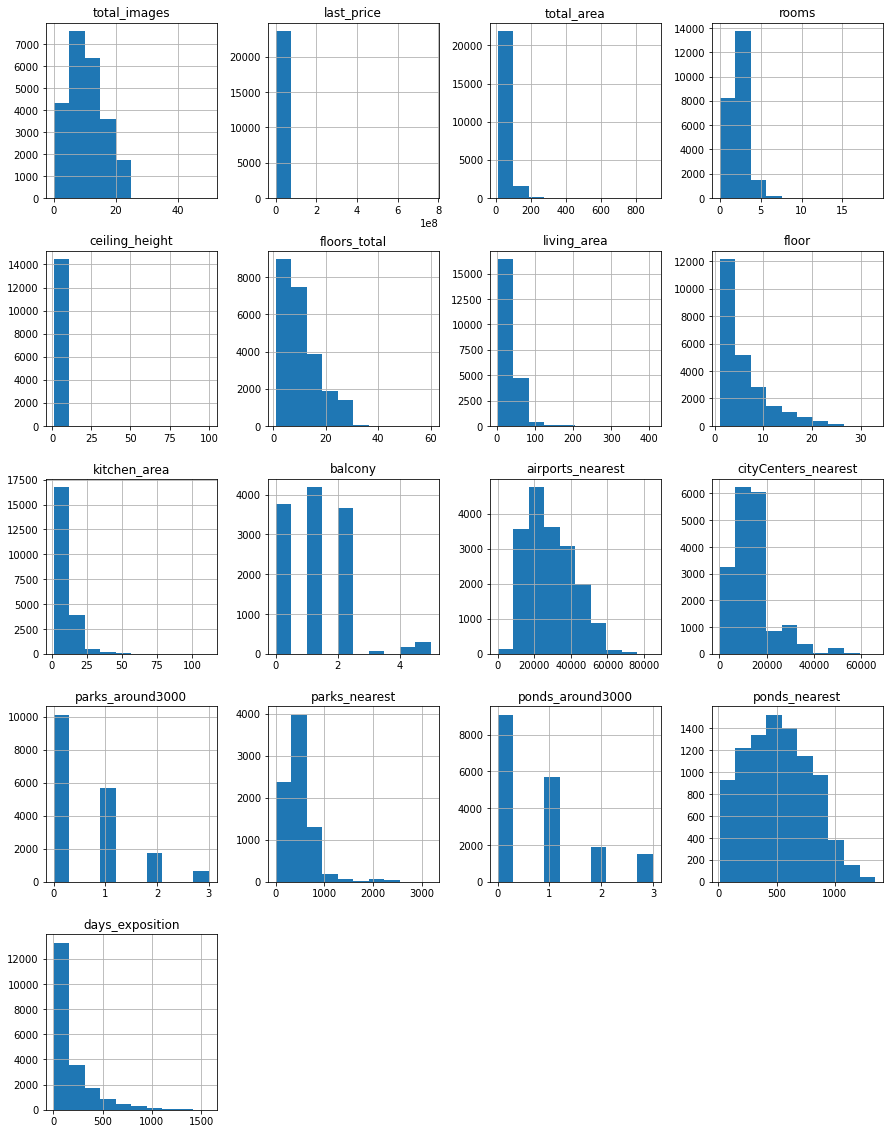

In [6]:
data.hist(figsize=(15, 20))

В ходе изучения предоставленной информации, установлено следующее:

отсутствую значения

некорректные типы данных

не_змеиное_название столбцов

присутствуют неявные дубликаты

присутствуют выбивающиеся значения

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошее начало и первый промежуточный вывод, так держать. </div>

### Предобработка данных

In [7]:
#Посмотрим на пропуски в процентном соотношении
data.isnull().sum().sort_values()/data.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

изменим тип данных

In [8]:
data['last_price'] = data['last_price'].astype(int)

In [9]:
#data['floors_total'].dropna(inplace=True)
data = data.dropna(subset=['floors_total'])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Можно отбросить </div>

In [10]:

data['floors_total'].isnull().sum()


0

In [11]:
data['floors_total'] = data['floors_total'].astype(int)

в квартирах студиях нет кухонь- их площадь входит в общую

In [12]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Логично </div>

является ли объект апартаментамми- очень важная информация, которой бы продавцы не пренебрегали т.к. апартаменты- это жилье в котором нельзя зарегестрироваться по месту жительства

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

если продавец не указал наличее балкона- скорее всего его нет

In [14]:
data['balcony'] = data['balcony'].fillna(value=0).astype(int)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Заполним нулями </div>

переведем столбец с датой в формат даты без времени, т.к. время не указано

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Тип даты подойдет тут лучше </div>

приведем cityCenters_nearest к надлежащему виду

In [16]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

не зная населенного пункта мы не сможем использовать данные по квартире далее 

In [17]:
data.dropna(subset=['locality_name'], inplace=True)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Также можно отбросить </div>

переименуем названия поселков

In [18]:
data = data.rename(columns={'поселок Рябово': 'поселок городского типа Рябово', 'поселок Тельмана': 'посёлок Тельмана'}) 

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> На самом деле в датасете разное написание е-ё встречаются существенно чаще и тут логичнее будет привести написание буквы одному виду при помощи replace по всему столбцу

In [19]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

<div class="alert alert-info"> <b>Комментарий студента:</b> Ок.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично!)

испавим не корректные высоты потолков: поделим на 10 высоты от 25 до 32

In [20]:
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height'] / 10

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Разделим аномально высокие потолки на 10

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Но ведь аномалии могут быть также и в нижней границе значений. Еще, аномалии могут встречаться не только в столбце с потолками, чтобы проанализировать аномалии более подробно посоветую вывести describe по всему датасету и посмотреть на min и max значения

In [21]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.00000,23565.000000,21700.000000,23565.000000,21489.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.73968,10.675875,34.454822,5.878124,10.489241,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.91158,6.594823,22.045359,4.871485,5.944202,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.00000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.51000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.65000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.80000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.00000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [22]:
# отбросим три нуля в стоимости 
data['last_price'] = data['last_price'] / 1000 

In [23]:
# в квартирах-студиях комнат нет - назначаем ноль
data.loc[data['studio'] == True, 'rooms'] = 0 

In [24]:
# заполним медианой пропуски в высоте потолков
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

In [25]:
# заполним пропуски в общем количестве этажей согласно принятой концепции
for i in [5, 9, 10, 14, 16, 24, 26, 29, 30, 34, 35, 37]:
 data.loc[(data['floors_total'].isna()) & (data['floor'] <= i), 'floors_total'] = i

In [26]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21489.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6540.058260,60.322824,2.070189,2.705109,10.675875,34.454822,5.878124,10.489241,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,10910.934722,35.657060,1.079270,0.715918,6.594823,22.045359,4.871485,5.944202,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,12.190000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4646.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6790.000000,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,763000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В разделе "Предобработка данных" было проведено довольно много анализа и работы, все же стоит написать по нему хотя бы короткий вывод

  Выполнена первая предобработка данных:
        теперь цены квартир отображаются в тысячах рублей, 
        лишние нули не мешаютсяв поле "дата размещения" осталась только дата, 
        высоты потолков приведены к реалистичным, 
        пропущенные этажности зданий заполнены, 
        квартирам-студям назначено единое число комнат 0, 
        пропущенные значения в полях "апартаменты" и "балкон" заполнены, 
        столбец cityCenters_nearest переименован, 
        данные приведены к целочисленным, где это возможно.

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Хорошо, только нижние границы по столбцам немного недоразобрал. Обрати внимание например на нижние границы в потолках и ценах, могут-ли быть такие значения

In [64]:
data.loc[data['ceiling_height'] < 2,'ceiling_height'] = None
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,dayofweek,month,year,city_centers_nearest_km
count,23565.000000,23565.000000,23565.000000,23565.000000,23562.000000,23565.000000,21700.000000,23565.000000,23565.000000,23565.000000,...,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000,23565.000000,23565.000000,23565.000000,23565.000000,18064.000000
mean,9.878421,6540.058260,60.322824,2.070189,2.705286,10.675875,34.454822,5.878124,0.002122,0.006196,...,0.611569,490.580448,0.769499,518.289509,180.741395,99.405837,2.567367,6.401570,2017.371016,14.186504
std,5.681156,10910.934722,35.657060,1.079270,0.715783,6.594823,22.045359,4.871485,0.046015,0.078470,...,0.802088,341.572956,0.938669,278.009558,219.732782,50.389433,1.788279,3.492948,1.037393,8.621131
min,0.000000,12.190000,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,0.111835,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,0.000000,0.000000,...,0.000000,288.000000,0.000000,293.000000,45.000000,76.566125,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4646.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,0.000000,0.000000,...,0.000000,455.000000,1.000000,503.000000,95.000000,95.000000,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6790.000000,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,0.000000,0.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,114.213198,4.000000,10.000000,2018.000000,16.000000
max,50.000000,763000.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,1.000000,1.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1907.500000,6.000000,12.000000,2019.000000,66.000000


<div class="alert alert-info"> <b>Комментарий студента:</b> Стоимость квартиры за 12 млн., я считаю это довольно-таки неплохой минмум)</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v 3.0 ⚠️:</b> Но в last_price данные у нас не в миллионах, мы разделил столбец на 1000 и в нижней границе сейчас 12 целых 190 тысячных, 12190 рублей

<div class="alert alert-info"> <b>Комментарий студента:</b> Готово.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Вывод добавлен

### Посчитайте и добавьте в таблицу новые столбцы

    цена одного квадратного метра

In [28]:
data['metre_price'] = data['last_price'] / data['total_area']

    день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [29]:
data['dayofweek'] = data['first_day_exposition'].dt.dayofweek

    месяц публикации объявления

In [30]:
data['month'] = data['first_day_exposition'].dt.month

    год публикации объявления

In [31]:
data['year'] = data['first_day_exposition'].dt.year

    тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [32]:

data['floor_group'] = 'другой'
data['floor_group'] = data['floor_group'].where(data['floor'] > 1, 'первый')
data['floor_group'] = data['floor_group'].where(data['floor'] < data['floors_total'], 'последний')

    расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)

In [33]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Великолепно, все пункты задания выполнены в полном объёме

### Проведите исследовательский анализ данных

In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre_price,dayofweek,month,year,floor_group,city_centers_nearest_km
0,20,13000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,120.370370,3,3,2019,другой,16.0
1,7,3350.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82.920792,1,12,2018,первый,19.0
2,10,5196.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92.785714,3,8,2015,другой,14.0
3,0,64900.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,84.0,3.0,234.0,424.0,408.176101,4,7,2015,другой,7.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100.000000,1,6,2018,другой,8.0


общая площадь

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


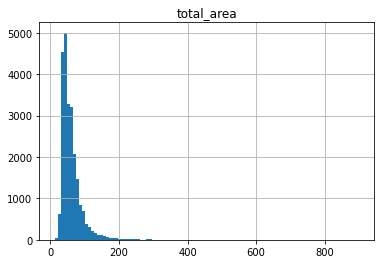

In [35]:
data.hist('total_area', bins=100);
print(data['total_area'].describe())

Из гистограммы видно, что большим спросом пользуются квартиры до 70 м2, среднее значение площади составляет - 60 м2. 

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Соглашусь)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Последовательно строишь графики по всем необходимым столбцам

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Могу посоветовать посмотреть данные материалы, чтобы научиться оформлять графики еще лучше:

[Здесь](https://pyprog.pro/mpl/mpl_title.html)
  
[И здесь](https://pyprog.pro/mpl/mpl_axis_signatures.html)
    
[И вот тут](https://www.python-graph-gallery.com)
    
   

жилая площадь

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


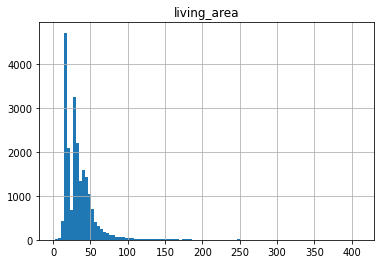

In [36]:
data.hist('living_area', bins=100);
print(data['living_area'].describe())

Из гистограммы видно, что большим спросом пользуются квартиры , жилая площадь которых имеет среднее значение - 35 м2.

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Вполне похоже на правду

площадь кухни

count    21489.000000
mean        10.489241
std          5.944202
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


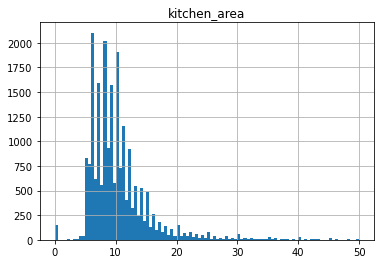

In [65]:
data.hist('kitchen_area', bins=100,range = (0,50));
print(data['kitchen_area'].describe())

средняя площадь кухонь в предложенных квартирах составляет 6 м

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Да, в основном около 6 метров

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Добавь здесь пожалуйста комментарий

цена объекта

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Тут хорошо бы отредактировать bins и range

<div class="alert alert-info"> <b>Комментарий студента:</b> Так даже лучше)</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера v 2.0 ⚠️:</b> Только комментарий был по ценам)

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Здесь также добавь пожалуйста комментарий и после редактирования графика это будет сделать легче

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64


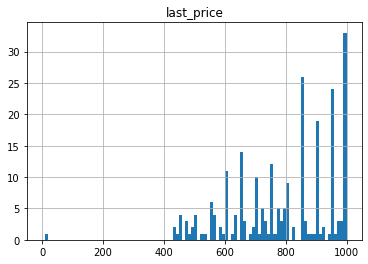

In [67]:
data.hist('last_price', bins=100,range = (0,1000));
print(data['last_price'].describe())

In [ ]:
стоимость квартир начинается с 12 миллионов и уходит в космос)

<div class="alert alert-warning">
<b>Комментарий ревьюера v 3.0 ⚠️:</b> Не с 12 миллионов) И основная часть около 4-5 млн

количество комнат

count    23565.000000
mean         2.070189
std          1.079270
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


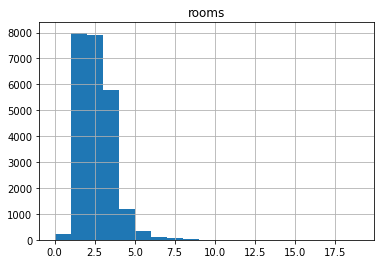

In [39]:
data.hist('rooms', bins=data['rooms'].max());
print(data['rooms'].describe())

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Верно

более продаваемы двух комнатные квартиры

count    23562.000000
mean         2.705286
std          0.715783
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


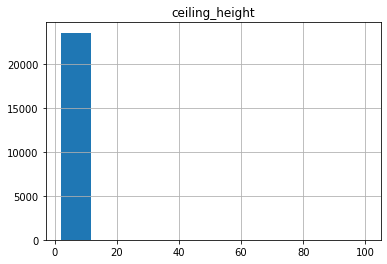

In [69]:
data.hist('ceiling_height', bins=10);
print(data['ceiling_height'].describe())

средняя высота потолков - стандартная: от 2 до 3 метров

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Для потолков также поправь пожалуйста график и добавь комментарий

этаж квартиры

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> И по всем графикам этажей

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


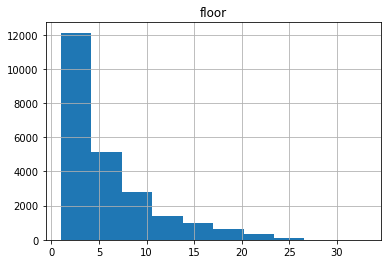

In [74]:
data.hist('floor', bins= 10);
print(data['floor'].describe())

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> И сама застройка похоже низкоэтажная

чаще всего продаются квартиры до 4 этажа

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


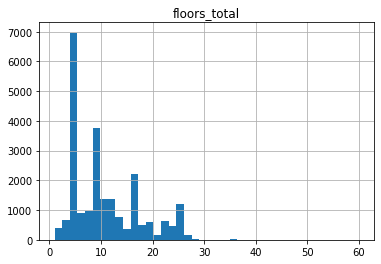

In [76]:
data.hist('floors_total', bins=40);
print(data['floors_total'].describe())

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Типовые дома выделяются

больше квартиры продаются в пяти и девятиэтажных домах

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Также и по параметрам удаленности

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


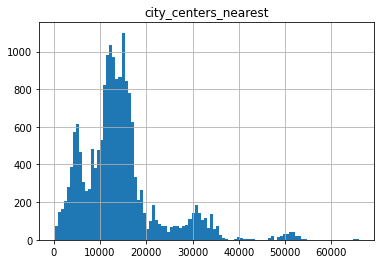

In [77]:
data.hist('city_centers_nearest', bins=100);
print(data['city_centers_nearest'].describe())

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Да, чаще всего в спальных районах

больше всего квартир продается на достаточном удалении от центра

расстояние до ближайшего аэропорта

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


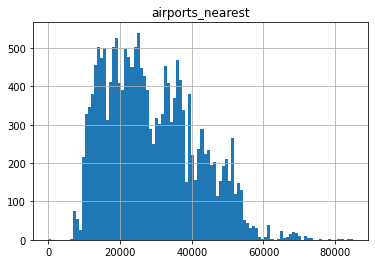

In [79]:
data.hist('airports_nearest', bins=100);
print(data['airports_nearest'].describe())

среднее удаление от аэропорта - 25 км. что не удивительно т.к. аэропрты не строят слишком близко к городу

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Хорошо

расстояние до ближайшего парка 

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


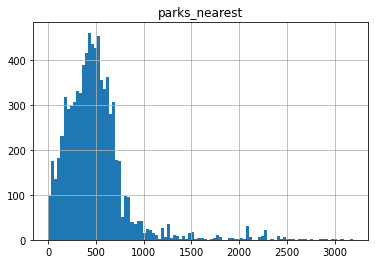

In [80]:
data.hist('parks_nearest', bins=100);
print(data['parks_nearest'].describe())

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Согласен

в городе очень много парков

день

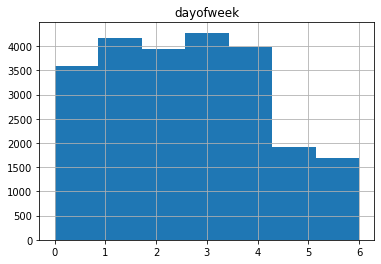

In [46]:
data.hist('dayofweek', bins=7);

в будние дни предложений с недвижимостью совершается почти в два раза больше чем в выходные

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> В выходные объявлений меньше

месяц

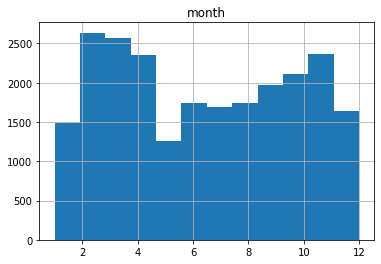

In [47]:
data.hist('month', bins=12);

самый удачный месяц для продажи кватриры - февраль. самый не удачный - май, вероятно обусловлено это подготовкой людей к летним отпускам и началом дачного сезона

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Верно

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Хорошо построил графики по параметрам, но по заданию также просили указать для них комментарии

Среднее время продажи квартиры в днях: 180
Медианное время продажи квартиры в днях: 95
Количество объявлений, которые сняты через:
45 дней: 0
60 дней: 538
90 дней: 0


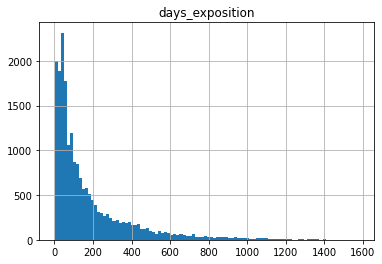

In [48]:
data.hist('days_exposition', bins=100);
#data.hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median()))

print('Количество объявлений, которые сняты через:')
print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition']==90]['days_exposition'].count())

Можно сказать, что среднее время продажи квартиры составляет 180 деней. Но если взять медиану - то это уже 95 дней, в два раза меньше. Почему так? Потому что у нас есть "длинный хвост" квартир, которые продавались очень долго, буквально годами.
Я бы предложил считать быстрыми продажи до 95 дней, а необычно долгими - свыше 180 дней. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично установил границы days_exposition

Факторы оторые больше всего влияют на общую (полную) стоимость объекта

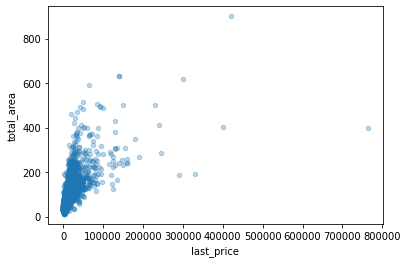

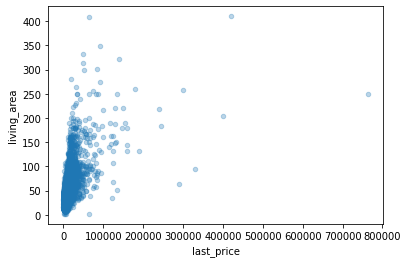

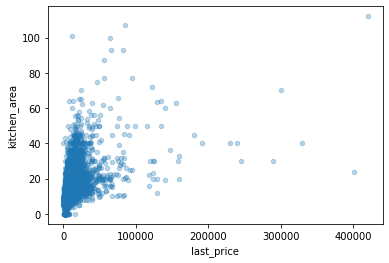

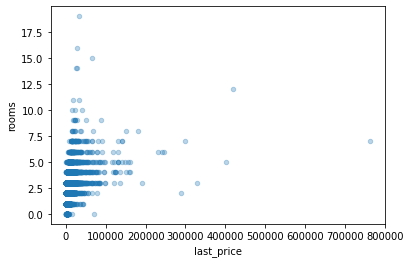

In [49]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3);
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3);
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3);

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Диаграмма рассеяния наиболее подходящий график для анализа зависимости от площади

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В разделе изучения зависимости от комнат и площадей стоит добавить анализ корреляции Пирсона, чтобы точнее понять наличие/отсутствие линейной зависимости

<div class="alert alert-info"> <b>Комментарий студента:</b> Так же к диаграмме добавил анализ</div>

<div class="alert alert-danger">
<b>Комментарий ревьюера v 2.0 ❌:</b> Хм, но корреляции Пирсона сейчас нигде нет

<div class="alert alert-success">
<b>Комментарий ревьюера v 3.0 ✔️:</b> Корреляция добавлена

In [83]:
print(data['rooms'].corr(data['last_price']))
print(data['last_price'].corr(data['total_area']))

0.36311052455959736
0.6536213939252803


Корреляция в 0.36 и 0.65 говорит о наличии связи, однако не слишком сильной. Хотя корреляция иллюстрирует зависимость между величинами, она не доказывает наличие причинно-следственной связи. Нельзя сказать, что есть прямая зависимость от количества комнат и пощадей на стоимость квартир. Вероятнее всего это указывает на разнообразие рынка и финансовые амбиции проавцов квартир. 

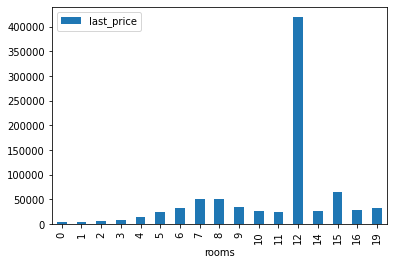

In [50]:
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar');

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> А тут и далее гораздо лучше выглядят графики по средним значениям

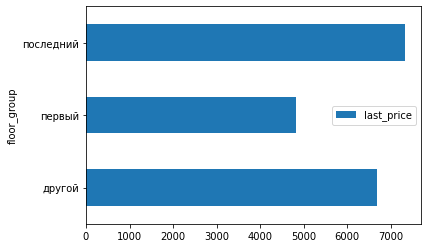

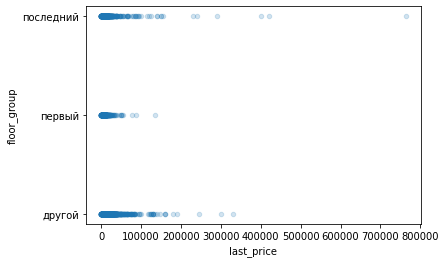

In [51]:
data.pivot_table(index='floor_group',values='last_price').plot(y='last_price', kind='barh');

data.plot(x='last_price', y='floor_group', kind='scatter', alpha=0.2);

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Логично

    Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.
    Самые дорогие варианты квартир находятся в центре города, однако в центре.
    Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.
    Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И комментарии по зависимостям также указаны

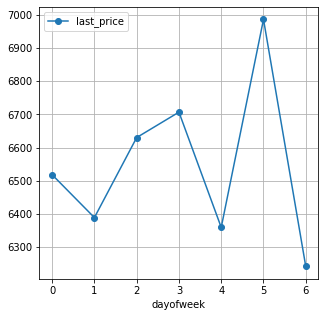

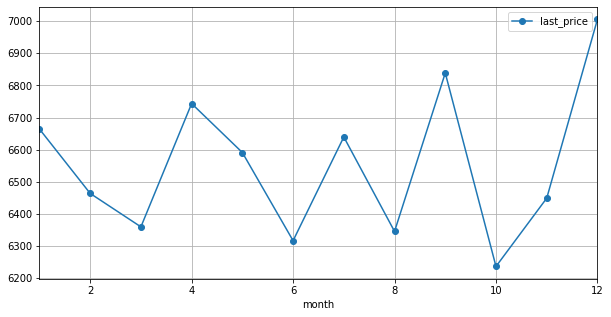

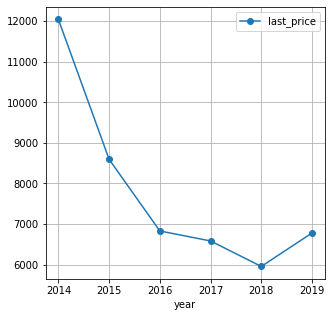

In [52]:
# Зависимость от дня размещения
(
    data.pivot_table(index='dayofweek', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

    Зависимость от дня, месяца и года
    День недели: дороже всего квартиры, опубликованные в субботу, дешевле всего в воскресенье.
    Месяц: дороже всего квартиры, продающиеся в декабре, дешевле всего в ноябре.
    Год: квартиры стремительно дешевели с 2014 по 2018 год, в 2019 замечено небольшое подорожание.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Замечательно проанализировал зависимости от временных показателей

In [53]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='metre_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('metre_price', ascending=False)

,metre_price
locality_name,
Санкт-Петербург,114
Пушкин,103
деревня Кудрово,92
поселок Парголово,90
поселок Мурино,85
поселок Шушары,78
Колпино,75
Всеволожск,68
Гатчина,68


    Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано появлением новых районов с развитой инфраструктурой. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Десятку замыкают города с наименьшей стоимостью - Гатчина и Всеволожск, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Ты правильно ответил на вопрос задания!

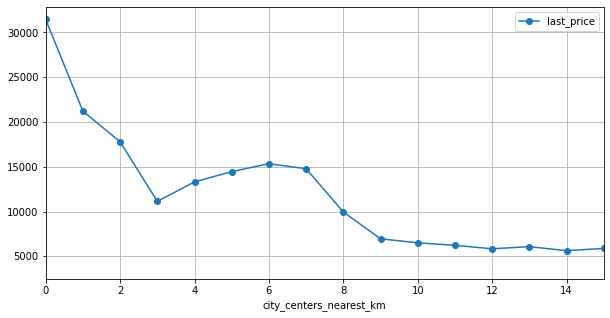

In [54]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

    Центральная зона - это 3 км и меньше. На расстоянии с 3 до 7 км цены колеблются. На удалении свыше 7 км средняя цена на квартиры резко снижается.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Средние цены по километрам посчитаны как надо

### Общий вывод

Зависимость цены квартиры от числа комнат в центре такая же, как и в целом по городу
В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого
В центре есть очень дорогие однокомнатные квартиры
В центральной зоне почти нет зависимости от удалённости от центра города. Стоимость даже немного повышается при удалении от центра - вероятно, это связано с расположением точки, которая является формальным центром города.
В центре значительно выше стоимость квартир, опубликованных в субботу и в декабре (вероятно, перед Новым годом люди хотят сделать подарок)
Стоимость квартир стремительно дешевела с 2014 по 2018 год, в 2019 замечено небольшое подорожание.

Срок продажи квартиры:

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 180 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько лет.

Факторы, влияющие на стоимость:

На стоимость больше влияет площадь квартиры, нежели число комнат. т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

Стоимость квадратного метра в топ-10 населённых пунктов:

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141

Факторы, влияющие на стоимость в центре Санкт-Петербурга:

В Санкт-Петербурге, в пределах 7 км. отмечается высокая стоимость. Стоимость квартир на удалении свыше 7 км. от центра  начинает резко снижаеться. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Супер, подробные и хорошие выводы по проекту

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Антон, проект отличный! У тебя очень сильные аналитические навыки и владение инструментами для проведения исследования. Но всё же в проекте есть несколько замечаний и я попрошу тебя исправить их, чтобы он стал еще лучше! </div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод